# Computationl Nuclear Physics Series - Code 1

A beam of neutrons strikes a 2 cm thick slab of material with cross section (sigma_t) = 4.0 cm−1. What fraction of the neutrons get
through the slab without a collision?

In other words, what is $\int_{2}^\infty \Sigma_{t} \exp(-\Sigma_t x) dx \sim e^{-2\times 4} ~\sim 0.00285$


This is a simple Monte Carlo simulation to compute the transmission of neutrons through a slab made of a material with a given total macroscopic cross-section.
The cross section is adjustable, as is the slab thickness and the number of neutrons to simulate.



In [ ]:
Sigma_t=1 # default sigma (cross section) is in 1/cm
thickness=1 # thickness is in cm
N = 1000000 # number of neutrons to simulate


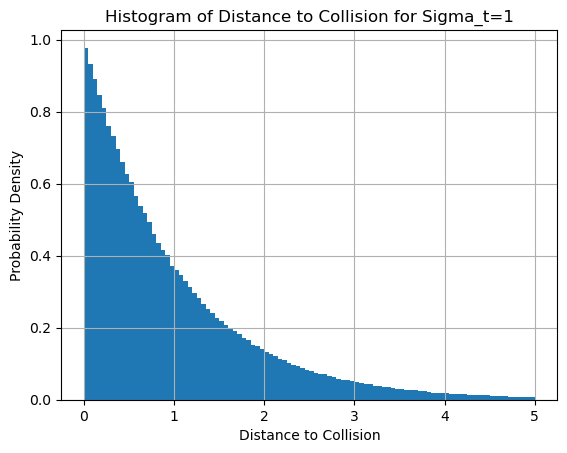

In [60]:
thetas = np.random.random(N) 
x = -np.log(1-thetas)/Sigma_t
plt.figure()
plt.hist(x,bins=100,range=(0,5),density=True)
plt.xlabel("Distance to Collision")
plt.ylabel("Probability Density")
plt.title("Histogram of Distance to Collision for Sigma_t="+str(Sigma_t))
plt.grid()
plt.show()

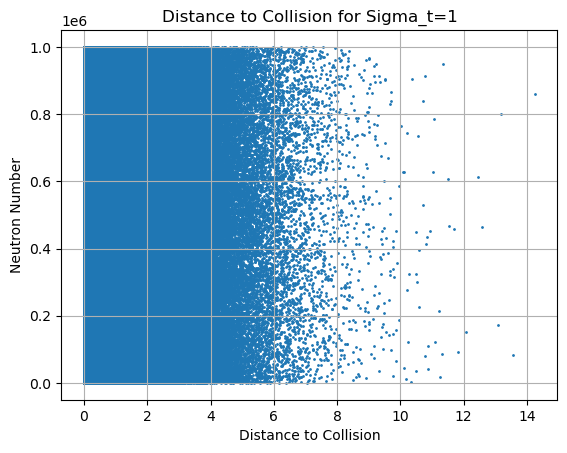

In [ ]:
thetas = np.random.random(N)  # generate N random numbers between 0 and 1
x = -np.log(1-thetas)/Sigma_t # distance to collision is calculated here
plt.figure()
plt.scatter(x,np.arange(N),s=1)
plt.xlabel("Distance to Collision")
plt.ylabel("Neutron Number")
plt.title("Distance to Collision for Sigma_t="+str(Sigma_t))
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def slab_transmission(Sig_t,thickness,N):
    """Compute the fraction of neutrons that leak through a slab
    Inputs:
    Sig_t:     The total macroscopic x-section
    thickness: Width of the slab
    N:         Number of neutrons to simulate

    Returns:
    transmission: The fraction of neutrons that made it through
    """
    thetas = np.random.random(N) # uniform random numbers between 0 and 1
    x = -np.log(1-thetas)/Sig_t # this is the distance to collision.
    transmission = np.sum(x>thickness)/N # fraction transmitted calculation

    #for a small number of neutrons we’ll output a little more
    if (N<=1000):
        plt.scatter(x,np.arange(N))
        plt.xlabel("Distance to collision")
        plt.ylabel("Neutron Number")
    return transmission

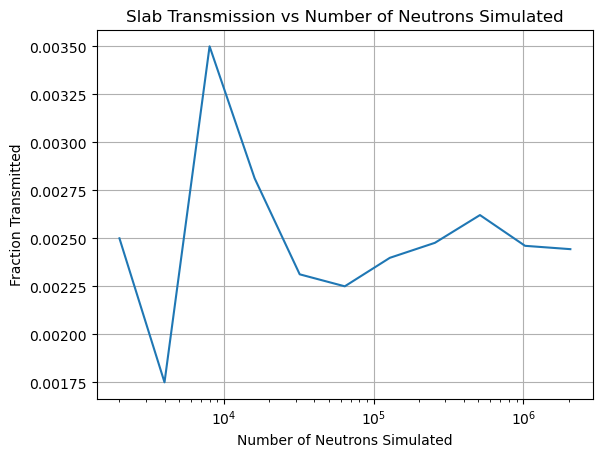

In [48]:
#plot of neutrons vs transmission
transmissions = []
for N in neuts:
    transmission = slab_transmission(Sigma_t, thickness, int(N))
    transmissions.append(transmission)
plt.figure()
plt.plot(neuts,transmissions)
plt.xscale('log')
plt.xlabel("Number of Neutrons Simulated")
plt.ylabel("Fraction Transmitted")
plt.title("Slab Transmission vs Number of Neutrons Simulated")
plt.grid()
plt.show()

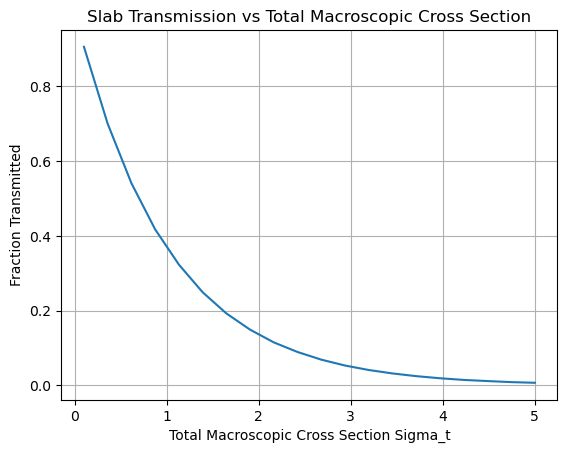

In [62]:
Sigma_ts = np.linspace(0.1,5,20)
transmissions = []
for Sig_t in Sigma_ts:
    transmission = slab_transmission(Sig_t, thickness, int(1e6))
    transmissions.append(transmission)
plt.figure()
plt.plot(Sigma_ts,transmissions)
plt.xlabel("Total Macroscopic Cross Section Sigma_t")
plt.ylabel("Fraction Transmitted")
plt.title("Slab Transmission vs Total Macroscopic Cross Section")
plt.grid()
plt.show()  

In [64]:
import ipywidgets as widgets
from ipywidgets import interact

@interact(Sigma_t=(0.1,5.0,0.1), thickness=(0.1,10.0,0.1), N=(100,1000000,100))
def update(Sigma_t=1.0, thickness=1.0, N=10000):
    transmission = slab_transmission(Sigma_t, thickness, int(N))
    print("Transmission for Sigma_t=",Sigma_t," thickness=",thickness," N=",N," is ",transmission)
        


interactive(children=(FloatSlider(value=1.0, description='Sigma_t', max=5.0, min=0.1), FloatSlider(value=1.0, …